# Adding the the required libraries 

In [205]:
import requests
from bs4 import BeautifulSoup as bs 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Extracting The URL

In [106]:
website_url = 'https://countrymusichalloffame.org/hall-of-fame/members/'
response = requests.get(website_url)

response.status_code

200

In [183]:
Cou_Music = bs(response.content,'lxml')

# 2.Getting The Artists List

In [178]:
print(Cou_Music)

<!DOCTYPE html>
<html lang="en-US">
<head>
<!-- Google Tag Manager -->
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':

new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],

j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=

'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);

})(window,document,'script','dataLayer','GTM-TVMMMDC');</script>
<!-- End Google Tag Manager -->
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<link href="https://gmpg.org/xfn/11" rel="profile"/>
<link href="https://countrymusichalloffame.org/wp/xmlrpc.php" rel="pingback"/>
<!--[if lt IE 9]>
	<script src="https://countrymusichalloffame.org/content/themes/bb-theme/js/html5shiv.js"></script>
	<script src="https://countrymusichalloffame.org/content/themes/bb-theme/js/respond.min.js"></script>
<![endif]-->
<title>Hall of Fam

In [184]:
Artists_headers = Cou_Music.find_all('h3')
Artists_headers

[<h3>Roy Acuff</h3>,
 <h3>Alabama</h3>,
 <h3>Bill Anderson</h3>,
 <h3>Eddy Arnold</h3>,
 <h3>Chet Atkins</h3>,
 <h3>Gene Autry</h3>,
 <h3>DeFord Bailey</h3>,
 <h3>Bobby Bare</h3>,
 <h3>Johnny Bond</h3>]

# Cleaning the Above List Via Looping

In [185]:
artists =[]
for n in range (len(Artists_headers)):
    Ar_name = Artists_headers[n].get_text()
    artists.append(Ar_name)
print(artists)

['Roy Acuff', 'Alabama', 'Bill Anderson', 'Eddy Arnold', 'Chet Atkins', 'Gene Autry', 'DeFord Bailey', 'Bobby Bare', 'Johnny Bond']


# The Alternative Approach Combining the aboves

In [186]:
Artists_List =[]
for artist in Cou_Music.find_all('h3'):
    print(artist.text)
    Artists_List.append(artist.text)

Roy Acuff
Alabama
Bill Anderson
Eddy Arnold
Chet Atkins
Gene Autry
DeFord Bailey
Bobby Bare
Johnny Bond


In [111]:
print(Artists_List)


['Roy Acuff', 'Alabama', 'Bill Anderson', 'Eddy Arnold', 'Chet Atkins', 'Gene Autry', 'DeFord Bailey', 'Bobby Bare', 'Johnny Bond']


In [112]:
years = Cou_Music.find_all('div',attrs={'class':'vertical-card_content--copy'})
type(years)
years

[<div class="vertical-card_content--copy">
 <p>
                     Inducted 1962                  </p>
 </div>,
 <div class="vertical-card_content--copy">
 <p>
                     Inducted 2005                  </p>
 </div>,
 <div class="vertical-card_content--copy">
 <p>
                     Inducted 2001                  </p>
 </div>,
 <div class="vertical-card_content--copy">
 <p>
                     Inducted 1966                  </p>
 </div>,
 <div class="vertical-card_content--copy">
 <p>
                     Inducted 1973                  </p>
 </div>,
 <div class="vertical-card_content--copy">
 <p>
                     Inducted 1969                  </p>
 </div>,
 <div class="vertical-card_content--copy">
 <p>
                     Inducted 2005                  </p>
 </div>,
 <div class="vertical-card_content--copy">
 <p>
                     Inducted 2013                  </p>
 </div>,
 <div class="vertical-card_content--copy">
 <p>
                     Inducted 1999      

In [187]:
inducted=[]
for i in range (len(years)):
    Y = years[i].get_text().replace("\n","").replace("Inducted","").strip()
    inducted.append(Y)
print(inducted)

['1962', '2005', '2001', '1966', '1973', '1969', '2005', '2013', '1999']


# We can find the inner elements by nesting the find and find_all

In [188]:
InductorYr = pd.DataFrame(list(zip(Artists_List,inducted)),columns=['Name','Inducted'])
InductorYr

,Name,Inducted
0,Roy Acuff,1962
1,Alabama,2005
2,Bill Anderson,2001
3,Eddy Arnold,1966
4,Chet Atkins,1973
5,Gene Autry,1969
6,DeFord Bailey,2005
7,Bobby Bare,2013
8,Johnny Bond,1999


# Applying the Split Method to isolate the list elements 

In [189]:
x = [element.text for element in Cou_Music.find_all("div", "vertical-card_content--copy")]

year = []
for element in x
    year.append(element.strip())

print(year)



SyntaxError: invalid syntax (<ipython-input-189-7740653b6873>, line 4)

In [ ]:
test_list = ['1','2','3','4','5','6','7','8','9','10'] 

def split_list(lst, n):  
    for i in range(0, len(lst), n): 
        yield lst[i:i + n] 

n = 3

output = list(split_list(test_list, n)) 
print(output)

In [ ]:
year = ['Inducted 1962', 'Inducted 2005', 'Inducted 2001', 'Inducted 1966', 'Inducted 1973', 'Inducted 1969', 'Inducted 2005', 'Inducted 2013', 'Inducted 1999']
def split_list(lst,n):
    for i in range(0,len(lst),n):
        yield lst[i:i+n]

n=1

output =list(split_list(year,n))
print(output)



In [ ]:
home_url=str('https://countrymusichalloffame.org/hall-of-fame/members/')
home_url

In [163]:
pages = [home_url]
page = 2
for n in range(15):
    address = home_url+'page/'+str(page)
    pages.append(address)
    page +=1
pages

['https://countrymusichalloffame.org/hall-of-fame/members/',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/2',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/3',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/4',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/5',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/6',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/7',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/8',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/9',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/10',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/11',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/12',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/13',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/14',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/

# Looping through all the pages to find the name and inducted years 

In [191]:
artists_all = []
years_all =[]

for i in pages:
    get_pages = requests.get(i)
    Cou_Music = bs(get_pages.content,'lxml')
    find_names = Cou_Music.find_all('div',attrs= {'class':'vertical-card_content--title'})
    find_years = Cou_Music.find_all('div',attrs= {'class':'vertical-card_content--copy'})
    for j in find_names:
        Ar_name = j.text.replace("\n", " ").strip()
        artists_all.append(Ar_name)
    for k in find_years :
        In_year = k.text.replace("\n", " ").replace("Inducted", " ").strip()
        years_all.append(In_year)
artists_all , years_all
    

(['Roy Acuff',
  'Alabama',
  'Bill Anderson',
  'Eddy Arnold',
  'Chet Atkins',
  'Gene Autry',
  'DeFord Bailey',
  'Bobby Bare',
  'Johnny Bond',
  'Bobby Braddock',
  'Harold Bradley',
  'Jerry Bradley',
  'Owen Bradley',
  'Rod Brasfield',
  'Garth Brooks',
  'Brooks & Dunn',
  'Jim Ed Brown',
  'Jim Ed Brown and the Browns',
  'Boudleaux and Felice Bryant',
  'Glen Campbell',
  'Bill Carlisle',
  'Carter Family',
  'Johnny Cash',
  'Roy Clark',
  'Cowboy Jack Clement',
  'Patsy Cline',
  'Hank Cochran',
  'Paul Cohen',
  'Floyd Cramer',
  'Vernon Dalhart',
  'Charlie Daniels',
  'Jimmie Davis',
  'Jimmy Dean',
  'Delmore Brothers',
  'Jim Denny',
  'Little Jimmy Dickens',
  'Ralph Emery',
  'The Everly Brothers',
  'Flatt And Scruggs',
  'Jim Foglesong',
  'Red Foley',
  'Tennessee Ernie Ford',
  'Fred Foster',
  'Joseph Frank',
  'Lefty Frizzell',
  'Connie B. Gay',
  'Don Gibson',
  'Vince Gill',
  'Johnny Gimble',
  'Merle Haggard',
  'Tom T. Hall',
  'Emmylou Harris',
  'Geor

# Creating a Data Frame for the Big List with columns Artist_Name and Inducted_Year

In [192]:
import matplotlib as plt
import datetime as dt

In [193]:
All_HOF = pd.DataFrame(list(zip(artists_all,years_all)),columns = ["Artist_name","Inducted_year"])
All_HOF
#All_HOF["Inducted_year"]= pd.datetime(All_HOF["Inducted_year"]).dt.year


,Artist_name,Inducted_year
0,Roy Acuff,1962
1,Alabama,2005
2,Bill Anderson,2001
3,Eddy Arnold,1966
4,Chet Atkins,1973
...,...,...
135,Hank Williams,1961
136,Bob Wills,1968
137,Mac Wiseman,2014
138,Tammy Wynette,1998


In [194]:
Sorted_ALL_HOF = All_HOF.sort_values(by="Inducted_year")
Sorted_ALL_HOF


,Artist_name,Inducted_year
98,Jimmie Rodgers,1961
101,Fred Rose,1961
135,Hank Williams,1961
0,Roy Acuff,1962
95,Tex Ritter,1964
...,...,...
108,Ricky Skaggs,2018
48,Johnny Gimble,2018
114,Ray Stevens,2019
15,Brooks & Dunn,2019


In [195]:
print(Sorted_ALL_HOF)

        Artist_name Inducted_year
98   Jimmie Rodgers          1961
101       Fred Rose          1961
135   Hank Williams          1961
0         Roy Acuff          1962
95       Tex Ritter          1964
..              ...           ...
108    Ricky Skaggs          2018
48    Johnny Gimble          2018
114     Ray Stevens          2019
15    Brooks & Dunn          2019
11    Jerry Bradley          2019

[140 rows x 2 columns]


# Removing The Duplicated 

In [196]:
All_HOF_Ddupd = Sorted_ALL_HOF.drop_duplicates() 
All_HOF_Ddupd


,Artist_name,Inducted_year
98,Jimmie Rodgers,1961
101,Fred Rose,1961
135,Hank Williams,1961
0,Roy Acuff,1962
95,Tex Ritter,1964
...,...,...
108,Ricky Skaggs,2018
48,Johnny Gimble,2018
114,Ray Stevens,2019
15,Brooks & Dunn,2019


In [215]:
By_Ind_year = Sorted_ALL_HOF.groupby(["Inducted_year"]).count()
print(By_Ind_year)

               Artist_name
Inducted_year             
1961                     3
1962                     1
1964                     1
1965                     1
1966                     4
1967                     4
1968                     1
1969                     1
1970                     2
1971                     1
1972                     1
1973                     2
1974                     2
1975                     1
1976                     2
1977                     1
1978                     1
1979                     2
1980                     3
1981                     2
1982                     3
1983                     1
1984                     2
1985                     1
1986                     2
1987                     1
1988                     2
1989                     3
1990                     1
1991                     1
1992                     2
1993                     1
1994                     1
1995                     2
1996                     3
1

In [217]:
By_Ind_year.rename(columns = {'Artist_name':'Number_of_inducted'},inplace=True) 

In [218]:
By_Ind_year


,Number_of_inducted
Inducted_year,
1961,3
1962,1
1964,1
1965,1
1966,4
1967,4
1968,1
1969,1
1970,2


# Visualization on the number of inducted per a particular year

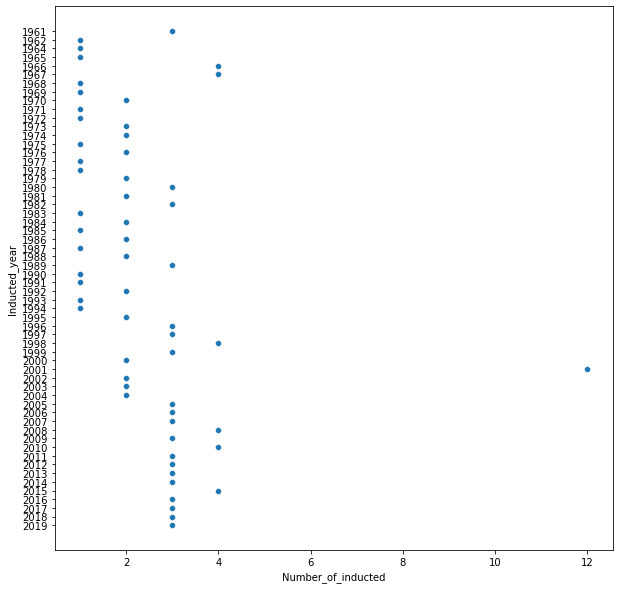

In [271]:
#figsize=(20,18)
fig,ax=plt.subplots(figsize=(10,10))
ax = sns.scatterplot(x='Number_of_inducted',y='Inducted_year' , data = By_Ind_year)

#ax.set_xticklabels(rotation=30)
#xlabel(rotation=30)
#plt.xticks(rotation=30)


# Bonus Hint From Teng

In [53]:
d = Cou_Music.find_all('div', class_='vertical-card_content')


In [54]:
web_address = []

for element in d:
    link = element.a['href']
    web_address.append(link)

web_address

['https://countrymusichalloffame.org/artist/boudleaux-and-felice-bryant/',
 'https://countrymusichalloffame.org/artist/glen-campbell/',
 'https://countrymusichalloffame.org/artist/bill-carlisle/',
 'https://countrymusichalloffame.org/artist/carter-family/',
 'https://countrymusichalloffame.org/artist/johnny-cash/',
 'https://countrymusichalloffame.org/artist/roy-clark/',
 'https://countrymusichalloffame.org/artist/cowboy-jack-clement/',
 'https://countrymusichalloffame.org/artist/patsy-cline/',
 'https://countrymusichalloffame.org/artist/hank-cochran/']